In [2]:
#Import Libraries
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd 
from datetime import datetime, timedelta
import yfinance as yf

In [3]:
#Gathering Data and Setting Timeframes
end_date = datetime.today()
start_date = end_date - timedelta(days = 365*5)
df = yf.download('CBA.AX', start=start_date, end=end_date)
df['Adj Close'] = df['Adj Close']


[*********************100%%**********************]  1 of 1 completed


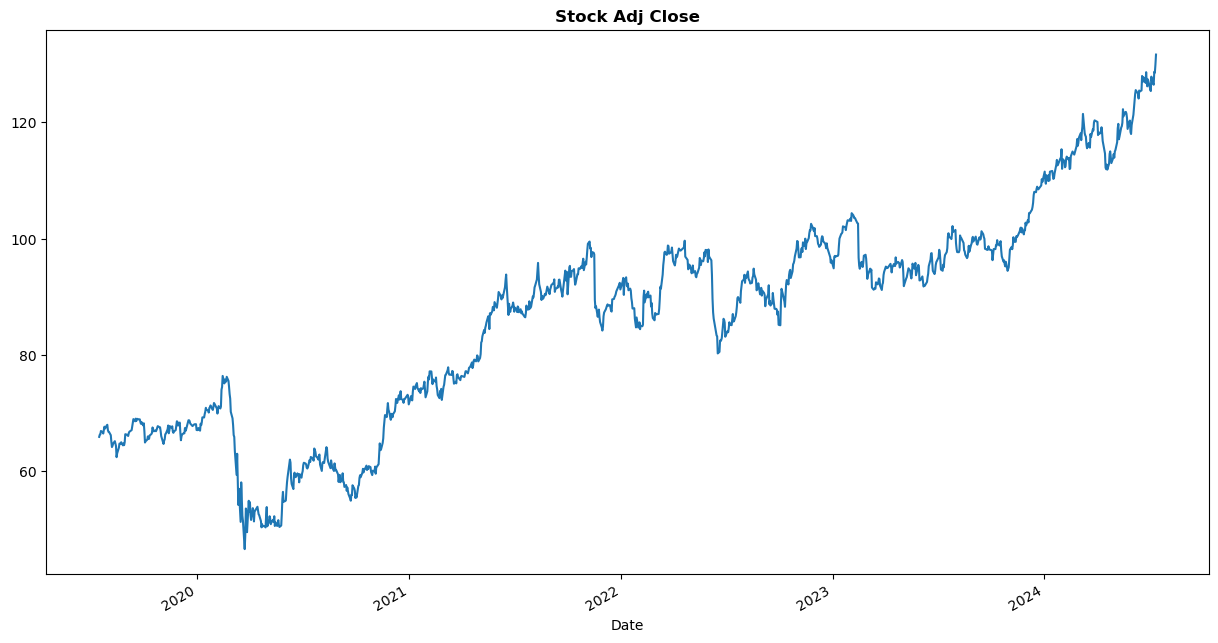

In [4]:
#Plotting Adj Close
plt.figure(figsize=(15,8))
df['Adj Close'].plot()
plt.title('Stock Adj Close', weight='bold')
plt.show()

Text(0.5, 1.0, 'Stock daily returns')

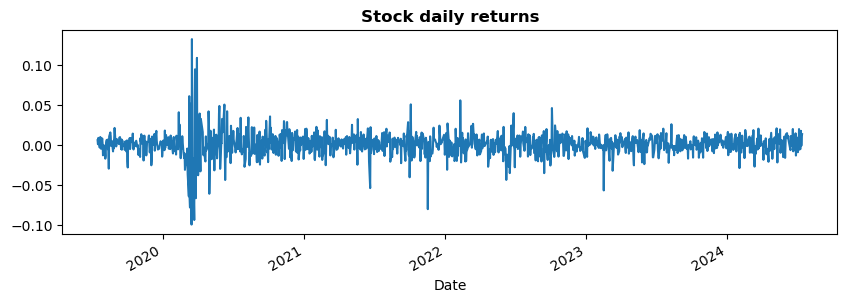

In [5]:
fig = plt.figure()
fig.set_size_inches(10,3)
df['Adj Close'].pct_change().plot()
plt.title("Stock daily returns", weight='bold')


0.015215196190383723

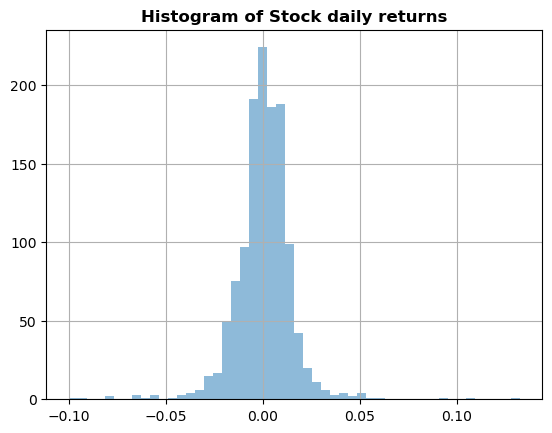

In [6]:
#Histogram
df['Adj Close'].pct_change().hist(bins=50, histtype='stepfilled', alpha=0.5)
plt.title(u'Histogram of Stock daily returns', weight='bold')
df['Adj Close'].pct_change().std()

In [7]:
returns = df["Adj Close"].pct_change().dropna()
mean = returns.mean()
sigma = returns.std()

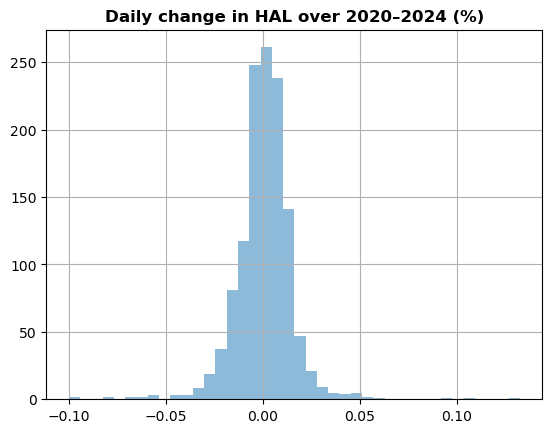

In [8]:
# VaR using the variance-covariance method
support = np.linspace(returns.min(), returns.max(), 100)
returns.hist(bins=40, histtype='stepfilled', alpha=0.5)
plt.title("Daily change in HAL over 2020–2024 (%)", weight='bold')
plt.show()

In [9]:
norm.ppf(0.05, mean, sigma)

-0.02436328701224537

In [10]:
#Simulate future returns
num_simulations = 10000
simulation_horizon = 252 #No. of trading days in year
simulated_returns = np.random.normal(np.mean(returns), np.std(returns), (simulation_horizon, num_simulations))


In [11]:
#Calculate the simulated portfolio values
initial_investment = 5000 
portfolio_values = initial_investment * np.exp(np.cumsum(simulated_returns, axis=0))
portfolio_returns = portfolio_values[-1] / portfolio_values[0] - 1

In [12]:
#Calculate portfolio returns and VaR at 95% confidence level
confidence_level = 0.95
VaR_monte_carlo = np.percentile(portfolio_returns, (1 - confidence_level) * 100)

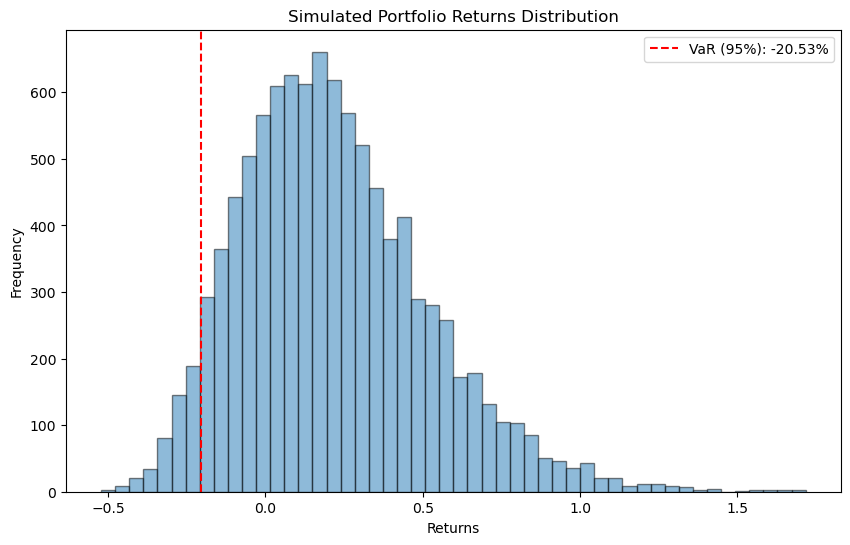

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns, bins=50, alpha=0.5, edgecolor='black')
plt.axvline(VaR_monte_carlo, color='red', linestyle='--', label=f'VaR (95%): {VaR_monte_carlo:.2%}')
plt.title('Simulated Portfolio Returns Distribution')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()
